In [27]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from IPython.display import set_matplotlib_formats
import glob
# %matplotlib inline
# set_matplotlib_formats('svg', 'png', 'pdf')
sns.set_theme()
sns.set(rc={'figure.figsize':(8,6), 'savefig.dpi':400, 'savefig.bbox':'tight'})


In [28]:
def get_section_results_eval(file):
    steps = []
    eval_returns = []
    eval_stdRets = []
    eval_time = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Eval_AverageReturn':
                steps.append(e.step)
                eval_returns.append(v.simple_value)
            if v.tag == 'Eval_StdReturn':
                eval_stdRets.append(v.simple_value)
            if v.tag == 'TimeSinceStart':
                eval_time.append(v.simple_value)
    data_np = np.vstack([steps, eval_returns, eval_stdRets, eval_time]).T
    data_df = pd.DataFrame(data_np, columns=['step', 'Eval_AverageReturn', 'Eval_StdReturn', 'TimeSinceStart'])
    return data_df

def get_section_results_train(file):
    steps = []
    eval_returns = []
    # eval_time = []
    # env_steps = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_AverageReturn':
                steps.append(e.step)
                eval_returns.append(v.simple_value)
            # if v.tag == 'Train_EnvstepsSoFar':
            #     env_steps.append(v.simple_value)
            # if v.tag == 'TimeSinceStart':
            #     eval_time.append(v.simple_value)
    data_np = np.vstack([steps, eval_returns]).T
    data_df = pd.DataFrame(data_np, columns=['step', 'Train_AverageReturn'])
    return data_df

def find_file(name, path='data/'):
    if isinstance(name, list):
        files = []
        for n in name:
            files.append(glob.glob('../data/*'+n+'*/event*')[0])
        return files
    else:
        assert isinstance(name, str)
        return glob.glob('../data/*'+name+'*/event*')

def draw_eval(file_name):
    df = get_section_results_eval(file_name)
    ax = sns.lineplot(x='step', y='Eval_AverageReturn', data=df)
    ax.fill_between(df["step"], y1=df["Eval_AverageReturn"] - df["Eval_StdReturn"], y2=df["Eval_AverageReturn"] + df      ["Eval_StdReturn"], alpha=.5)
    plt.xlabel('iteration')
    return ax

def draw_train(file_name, df=None):
    if df is None:
        df = get_section_results_train(file_name)
    ax = sns.lineplot(x='step', y='Train_AverageReturn', data=df)
    plt.xlabel('environment steps')
    return ax

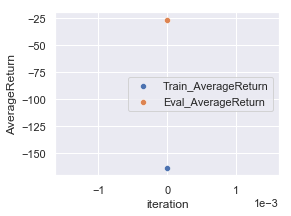

In [23]:
# q1
file_name = find_file('q2_obstacles_singleiteration_obstacles')[0]
df_train = get_section_results_train(file_name)
df_eval = get_section_results_eval(file_name)
plt.figure(figsize=(4, 3))
ax = sns.scatterplot(x='step', y='Train_AverageReturn', data=df_train)
ax = sns.scatterplot(x='step', y='Eval_AverageReturn', data=df_eval)
ax.legend(['Train_AverageReturn', 'Eval_AverageReturn'])
ax.set_ylabel('AverageReturn')
ax.set_xlabel('iteration')
ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax.figure.savefig('../../submission_hw4/figs/q2.png')

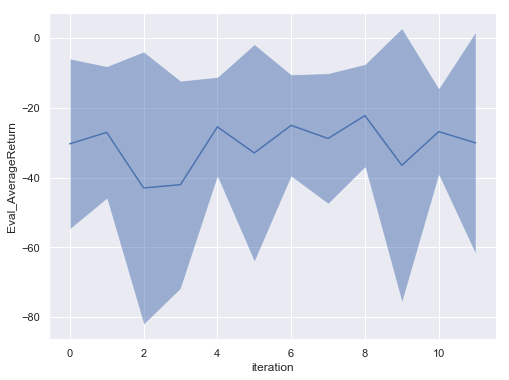

In [35]:
file_name = find_file('q3_obstacles')[0]
ax = draw_eval(file_name)
ax.figure.savefig('../../submission_hw4/figs/q3_obstacles.png')

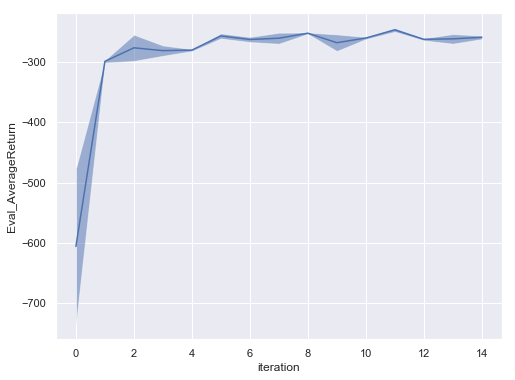

In [36]:
file_name = find_file('q3_reacher')[0]
ax = draw_eval(file_name)
ax.figure.savefig('../../submission_hw4/figs/q3_reacher.png')

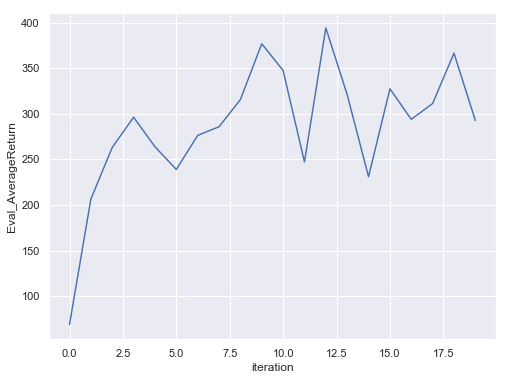

In [37]:
file_name = find_file('q3_cheetah')[0]
ax = draw_eval(file_name)
ax.figure.savefig('../../submission_hw4/figs/q3_cheetah.png')

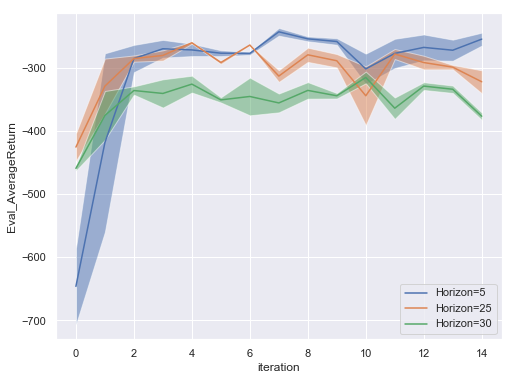

In [42]:
file_names = find_file(['q4_reacher_horizon5', 'q4_reacher_horizon15', 'q4_reacher_horizon30'])
for name in file_names:
    ax = draw_eval(name)
ax.legend(['Horizon=5', 'Horizon=25','Horizon=30'])
ax.figure.savefig('../../submission_hw4/figs/q4_horizon.png')

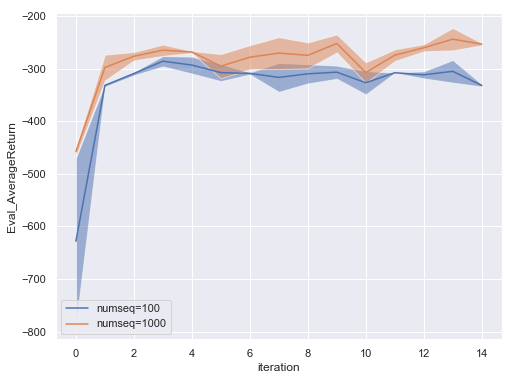

In [44]:
file_names = find_file(['q4_reacher_numseq100', 'q4_reacher_numseq1000'])
for name in file_names:
    ax = draw_eval(name)
ax.legend(['numseq=100', 'numseq=1000'])
ax.figure.savefig('../../submission_hw4/figs/q4_numseq.png')

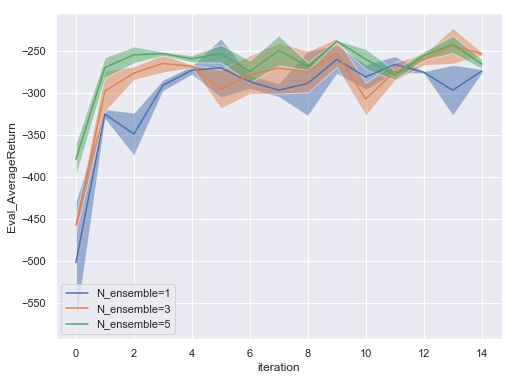

In [45]:
file_names = find_file(['q4_reacher_ensemble1', 'q4_reacher_ensemble3', 'q4_reacher_ensemble5'])
for name in file_names:
    ax = draw_eval(name)
ax.legend(['N_ensemble=1', 'N_ensemble=3','N_ensemble=5'])
ax.figure.savefig('../../submission_hw4/figs/q4_ensemble.png')